<a href="https://colab.research.google.com/github/DrSnek/Doctor/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import itertools
from sklearn.impute import SimpleImputer

from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

###Explore and Process Dataset

In [75]:
url = "https://drive.google.com/file/d/1se6o3oxuykXXmI-90vc1e4TMwN1vq9zL/view?usp=sharing"
url ='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
print(df)
df1 = df.drop(['SkinThickness'], axis = 1)
df2 = df1.drop(['DiabetesPedigreeFunction'], axis = 1)
df3 = df2.drop(['Insulin'], axis = 1)
print("")
print(df3)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
719           10      101             76             48      180  32.9   
720            2      122             70             27        0  36.8   
721            5      121             72             23      112  26.2   
722            1      126             60              0        0  30.1   
723            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

Seaborn:

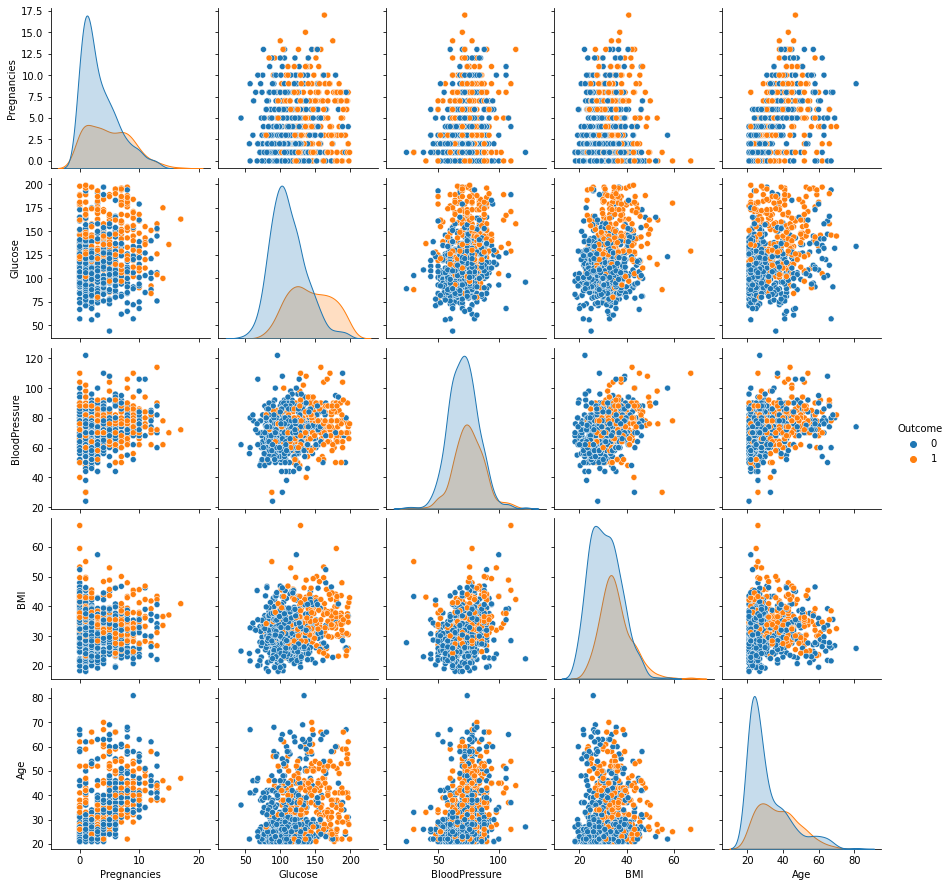

In [77]:
sns.pairplot(data=df3, hue = 'Outcome')

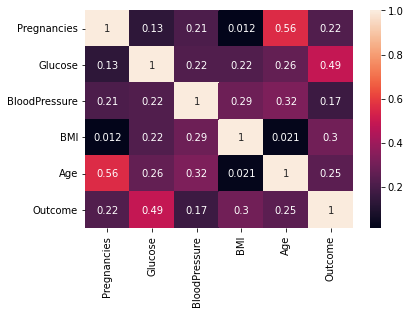

In [78]:
sns.heatmap(df3.corr(), annot = True)

###Data Imputation

In [79]:
check = 0
for item in df3['BMI']:
  if item == 0:
    check += 1

print(check)

0


###Helper Functions

In [80]:
def print_accuracy(y_test, y_pred):
  print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, y_pred)))
  print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, y_pred,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, y_pred,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)))
  print()

def draw_confusion_matrix(y_test, y_pred, classes):
  plt.cla()
  plt.clf()
  matrix = confusion_matrix(y_test, y_pred)
  plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion Matrix")
  plt.colorbar()
  num_classes = len(classes)
  plt.xticks(np.arange(num_classes), classes, rotation=90)
  plt.yticks(np.arange(num_classes), classes)
  fmt = 'd'
  thresh = matrix.max() / 2.
  for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, format(matrix[i, j], fmt), horizontalalignment="center", color="white" if matrix[i, j] > thresh else "black")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()
  plt.show()
  print()

def draw_roc_curve(y_test, y_score, title, c="blue", line_width=1):
  fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(y_test, y_score)
  plt.figure(2)
  aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
  plt.plot(fpr_log_reg, tpr_log_reg, color=c, lw=line_width, label = 'AUC = %0.3f' % aucroc)
  plt.title(title)
  plt.xlabel('False Positive Rates')
  plt.ylabel('True Positive Rates')
  plt.legend(loc = 'lower right')
  plt.show()
  print()

def draw_roc_curve_individual(y_test, y_score, label, line_width=1):
  fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(y_test, y_score)
  # plt.figure(2)
  aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
  plt.plot(fpr_log_reg, tpr_log_reg, lw=line_width, label = label + ', AUC = %0.3f' % aucroc)
  # plt.title(title)
  plt.xlabel('False Positive Rates')
  plt.ylabel('True Positive Rates')
  # plt.legend(loc = 'lower right')
  # plt.show()
  # print()

###Standardize and Encode Data

In [92]:
user_backup = df3
X = df3.drop("Outcome", axis = 1)
Y = df3["Outcome"].copy()

print("X shape before processing is", X.shape)
df_numerical = X

numerical_pipeline = Pipeline([
                               ("std_scaler", StandardScaler())
                               ])

numerical_features = list(df_numerical)

full_pipeline = ColumnTransformer([
                ("numerical", numerical_pipeline, numerical_features),
                ])
X_prepared = full_pipeline.fit_transform(X)

print("X shape after processing is", X_prepared.shape)
np.unique(np.isnan(X_prepared), return_counts=True)

X shape before processing is (724, 5)
X shape after processing is (724, 5)


(array([False]), array([3620]))

###Prepare Test Data Splits

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X_prepared, Y, test_size = 0.3, random_state = 42)

###Decision Tree Classifier

In [100]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

Accuracy:    0.738532
Precision:   0.588235
Recall:      0.579710
F1 Score:    0.583942



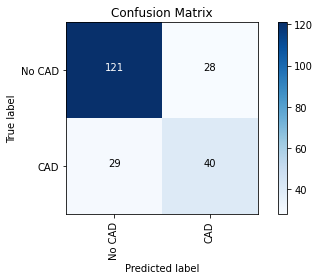

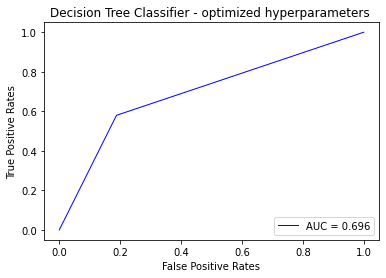

In [107]:
print_accuracy(y_test, pred)
draw_confusion_matrix(y_test, pred, ["No CAD", "CAD"])
draw_roc_curve(y_test, pred, "Decision Tree Classifier - optimized hyperparameters ", c="blue", line_width=1)

###Random Forest

Accuracy:    0.770642
Precision:   0.655738
Recall:      0.579710
F1 Score:    0.615385



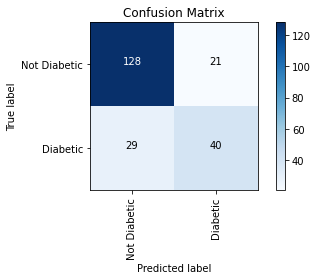

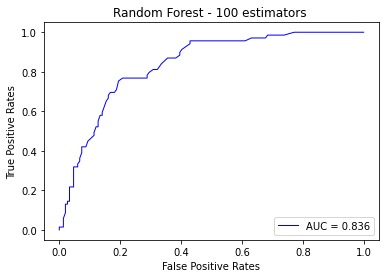

In [112]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rf_y_score = model.predict_proba(x_test)[:, 1]
print_accuracy(y_test, y_pred)
draw_confusion_matrix(y_test, y_pred, ["Not Diabetic", "Diabetic"])
draw_roc_curve(y_test, rf_y_score, "Random Forest - 100 estimators ", c="blue", line_width=1)

###User Input

In [115]:
#user_input = [Pregnancies, Glucose, BloodPressure, BMI, Age]
user_input = [[11, 200, 150, 53.2, 68]]
print(df3)

user_df = pd.DataFrame(user_input, columns=["Pregnancies", "Glucose", "BloodPressure", "BMI", "Age"])
df3 = user_backup.append(user_df, ignore_index=True)

X = df3.drop("Outcome", axis = 1)
Y = df3["Outcome"].copy()

print("X shape before processing is", X.shape)
df_numerical = X

numerical_pipeline = Pipeline([
                               ("std_scaler", StandardScaler())
                               ])

numerical_features = list(df_numerical)

full_pipeline = ColumnTransformer([
                ("numerical", numerical_pipeline, numerical_features),
                ])
user_inp = full_pipeline.fit_transform(X)

print("X shape after processing is", user_inp.shape)
np.unique(np.isnan(user_inp), return_counts=True)

     Pregnancies  Glucose  BloodPressure   BMI  Age  Outcome
0              6      148             72  33.6   50      1.0
1              1       85             66  26.6   31      0.0
2              8      183             64  23.3   32      1.0
3              1       89             66  28.1   21      0.0
4              0      137             40  43.1   33      1.0
..           ...      ...            ...   ...  ...      ...
720            2      122             70  36.8   27      0.0
721            5      121             72  26.2   30      0.0
722            1      126             60  30.1   47      1.0
723            1       93             70  30.4   23      0.0
724            4      110             75  16.2   16      NaN

[725 rows x 6 columns]
X shape before processing is (725, 5)
X shape after processing is (725, 5)


(array([False]), array([3625]))

In [116]:
u_prepared = np.array([user_inp[-1]])
y_temp = model.predict(u_prepared)
print(y_temp)

[1]
